In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [ ]:
file_path = "./data/assignmentMathImagingRecon_chestCT.mat"
with h5py.File(file_path, 'r') as mat_file:
    for key in mat_file.keys():
        print(f"Dataset: {key}, Shape: {mat_file[key].shape}")

Dataset: imageAC, Shape: (512, 512)


1


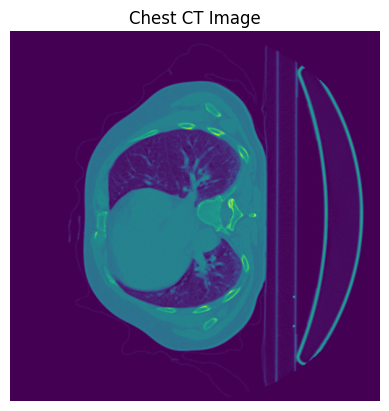

(512, 512)

In [21]:
#Loading Chest CT image
file_path = './data/assignmentMathImagingRecon_chestCT.mat'
with h5py.File(file_path, 'r') as mat:
    print(len(mat.keys()))
    dataset_name = list(mat.keys())[0]  
    chestCT = np.array(mat[dataset_name]) 
plt.imshow(chestCT)
plt.axis('off') 
plt.title("Chest CT Image")
plt.show()
chestCT.shape

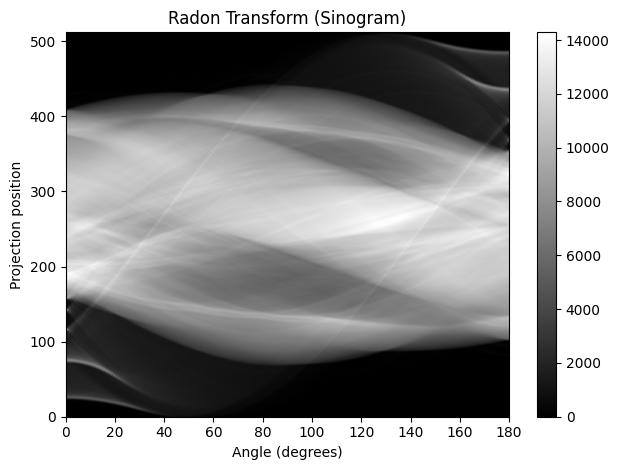

In [23]:
from skimage.transform import radon
angles = np.linspace(0, 180, 180, endpoint=False) 
# print(angles)

sinogram = radon(chestCT, theta=angles)
#Radon transform (sinogram)

plt.imshow(sinogram, cmap='gray', aspect='auto', extent=(0, 180, 0, sinogram.shape[0]))
plt.title('Radon Transform (Sinogram)')
plt.xlabel('Angle (degrees)')
plt.ylabel('Projection position')
plt.colorbar()
plt.tight_layout()
plt.show()

In [ ]:
def gaussian_noise(image, percentage):
    intensity_range=np.max(image)-np.min(image)
    noise=percentage*intensity_range
    gauss = np.random.normal(0, noise, image.shape) #Zero mean
    noisy_img=image+gauss
    return noisy_img

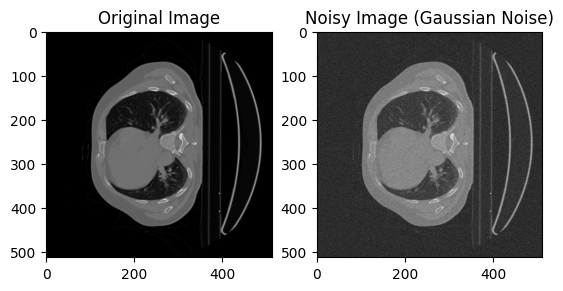

In [30]:
#Generating a noisy image 
noisy_img=gaussian_noise(chestCT,0.05)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(chestCT, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(noisy_img, cmap='gray')
ax[1].set_title("Noisy Image (Gaussian Noise)")
plt.show()

In [ ]:
def myART():
    